# **$R^2$ and Adjusted $R^2$ in Multiple Regression**

<h1 style="font-weight: bold; background: linear-gradient(to right, teal, skyblue); -webkit-background-clip: text; color: transparent;"> 1. Coefficient of Determination
</h1>

* ****Definition****: $R^2$ represents the proportion of the variance in the dependent variable ($y$) that is predictable from the independent variables $x_1, x_2, \ldots, x_p$.

$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

where:
* $\text{SS}_{\text{res}} = \sum_{i=1}^n (y_i - \hat{y}_i)^2$: Residual Sum of Squares
* $\text{SS}_{\text{tot}} = \sum_{i=1}^n (y_i - \bar{y})^2$: Total Sum of Squares
* ****Interpretation****: $R^2$ ranges from 0 to 1. An $R^2$ close to 1 indicates that a large portion of the variance in $y$ is explained by the model.

<h1 style="font-weight: bold; background: linear-gradient(to right, teal, skyblue); -webkit-background-clip: text; color: transparent;"> 2. Adjusted R-squared
</h1>

* ****Definition****: Adjusted $R^2$ adjusts $R^2$ for the number of predictors, accounting for model complexity. It is calculated as:

$$
\text{Adjusted } R^2 = 1 - \frac{\text{MSE}}{\text{MST}}
$$

where:
* $\text{MSE} = \frac{\text{SS}_{\text{res}}}{n - p - 1}$: Mean Squared Error, with $n - p - 1$ degrees of freedom.
* $\text{MST} = \frac{\text{SS}_{\text{tot}}}{n - 1}$: Mean Total Sum of Squares.
* ****Interpretation****: Adjusted $R^2$ accounts for degrees of freedom and tends to penalize overfitting. Unlike $R^2$, it can decrease if unnecessary predictors are added.

<h1 style="font-weight: bold; background: linear-gradient(to right, teal, skyblue); -webkit-background-clip: text; color: transparent;"> 3. Degrees of Freedom in Multiple Regression
</h1>

* ****Degrees of Freedom****:
* ****Residual Degrees of Freedom****: $n - p - 1$, where $n$ is the number of observations and $p$ is the number of predictors.
* ****Total Degrees of Freedom****: $n - 1$.
* ****Role in Model Evaluation****:
* ****Residuals****: Degrees of freedom for the residuals help determine the penalty in Adjusted $R^2$.
* ****Adjusted $R^2$****: Uses residual degrees of freedom to adjust the $R^2$, making it more reliable when comparing models with different numbers of predictors.

In [1]:
# Question: What is Adjusted R^2? &
# Why is it better than the coefficient # of determination (R^2) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from IPython.display import display, Latex

# Sample data generation for demonstration
np.random.seed(47); plt.style.use('dark_background')
n_samples = 100
x1 = np.random.randint(10, 50, n_samples)
x2 = np.random.randint(60, 100, n_samples)
noise = np.random.normal(0, 1, n_samples)
y = 5 + 0.3 * x1 + 0.6 * x2 + noise

# Generate additional noise variables
x3 = np.random.normal(3, 1, n_samples)
x4 = np.random.normal(0, 1, n_samples)
x5 = np.random.normal(0, 1, n_samples)

# Create a DataFrame
data = pd.DataFrame(dict(x1=x1, x2=x2, x3=x3, x4=x4, x5=x5, y=y))
data.sample()

,x1,x2,x3,x4,x5,y
64,31,90,3.012262,1.841108,-1.249037,67.815644


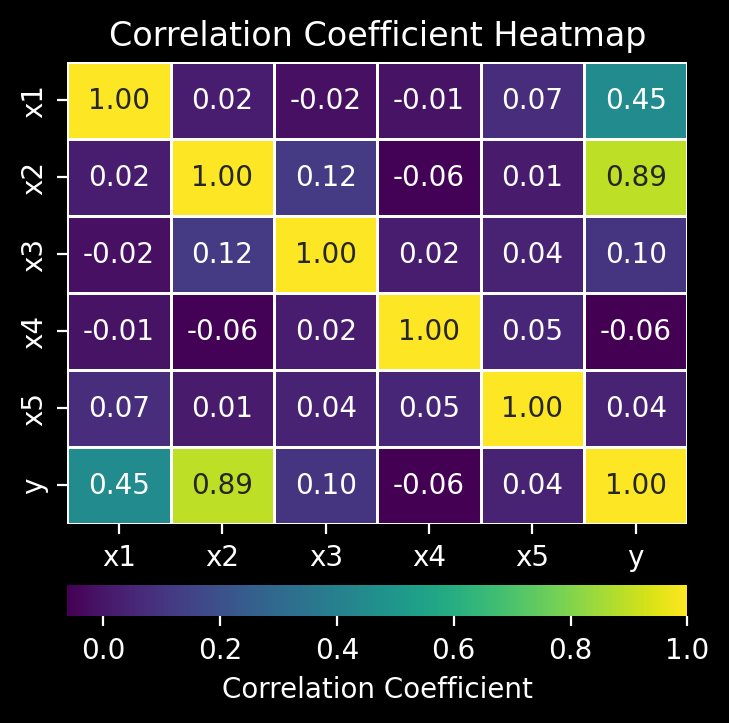

In [2]:
plt.figure(figsize=(4, 4), dpi=200)
sns.heatmap(data.corr(), annot=True, fmt='.2f', 
            cbar_kws={
                'label': 'Correlation Coefficient', 
                'orientation': 'horizontal', 
                'pad': 0.1}, linewidth=1.0, linecolor='white', 
            cmap='viridis')
plt.title('Correlation Coefficient Heatmap')
plt.show()

In [3]:
metrics = []
n = len(y)

# Loop through each predictor subset
for i in range(data.shape[1] - 1):  
    X_subset = data.iloc[:, : i + 1]  # Select predictors

    model = LinearRegression()
    model.fit(X_subset, y)  # Fit the model on the current subset

    y_pred = model.predict(X_subset)  # Make predictions
    r2 = r2_score(y, y_pred)  # Calculate R^2

    k = X_subset.shape[1]  # Number of predictors in the current subset
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))  # Calculate Adjusted R^2

    coefficients = np.round(model.coef_, 3)
    intercept = np.round(model.intercept_, 3)

    # Construct the model equation as a LaTeX string with y_hat
    model_eq_terms = []
    
    # Append intercept with appropriate sign
    if intercept >= 0:
        model_eq_terms.append(f"{intercept}")
    else:
        model_eq_terms.append(f"{intercept}")

    for i, coeff in enumerate(coefficients):
        if coeff >= 0:
            model_eq_terms.append(f"+ {coeff} \\cdot x_{{{i+1}}}")
        else:
            model_eq_terms.append(f"- {abs(coeff)} \\cdot x_{{{i+1}}}")

    model_eq = f"\\hat{{y}} = " + " ".join(model_eq_terms)

    # Store metrics
    metrics.append({
        "Predictors": X_subset.columns.tolist(),
        "R^2": np.round(r2, 4),
        "Adjusted R^2": np.round(adj_r2, 4),
        "Model": model_eq  # Store LaTeX equation as a string
    })
    
# Start the LaTeX table
latex_table = "\\begin{array}{|l|l|}\n"
latex_table += "\\hline\n"
latex_table += "\\textbf{Model} & \\textbf{Equation for Prediction} \\\\\n"
latex_table += "\\hline\n"

# Loop through each model and add to the table
for metric_index, metric in enumerate(metrics):
    model_label = f"Model{{-}}{metric_index + 1}"
    model_eq = metric['Model']  # Get the model equation

    # Add the row for the current model
    latex_table += f"{model_label} & {model_eq} \\\\\n"
    latex_table += "\\hline\n"

# End the LaTeX table
latex_table += "\\end{array}"

# Display the combined LaTeX table
display(Latex(latex_table))

<IPython.core.display.Latex object>

In [4]:
metrics_df = pd.DataFrame(metrics)
metrics_df['Num Variables'] = metrics_df['Predictors'].apply(len)
metrics_df.drop('Model', axis=1)

,Predictors,R^2,Adjusted R^2,Num Variables
0,[x1],0.2005,0.1924,1
1,"[x1, x2]",0.9820,0.9817,2
2,"[x1, x2, x3]",0.9820,0.9815,3
3,"[x1, x2, x3, x4]",0.9821,0.9813,4
4,"[x1, x2, x3, x4, x5]",0.9821,0.9812,5


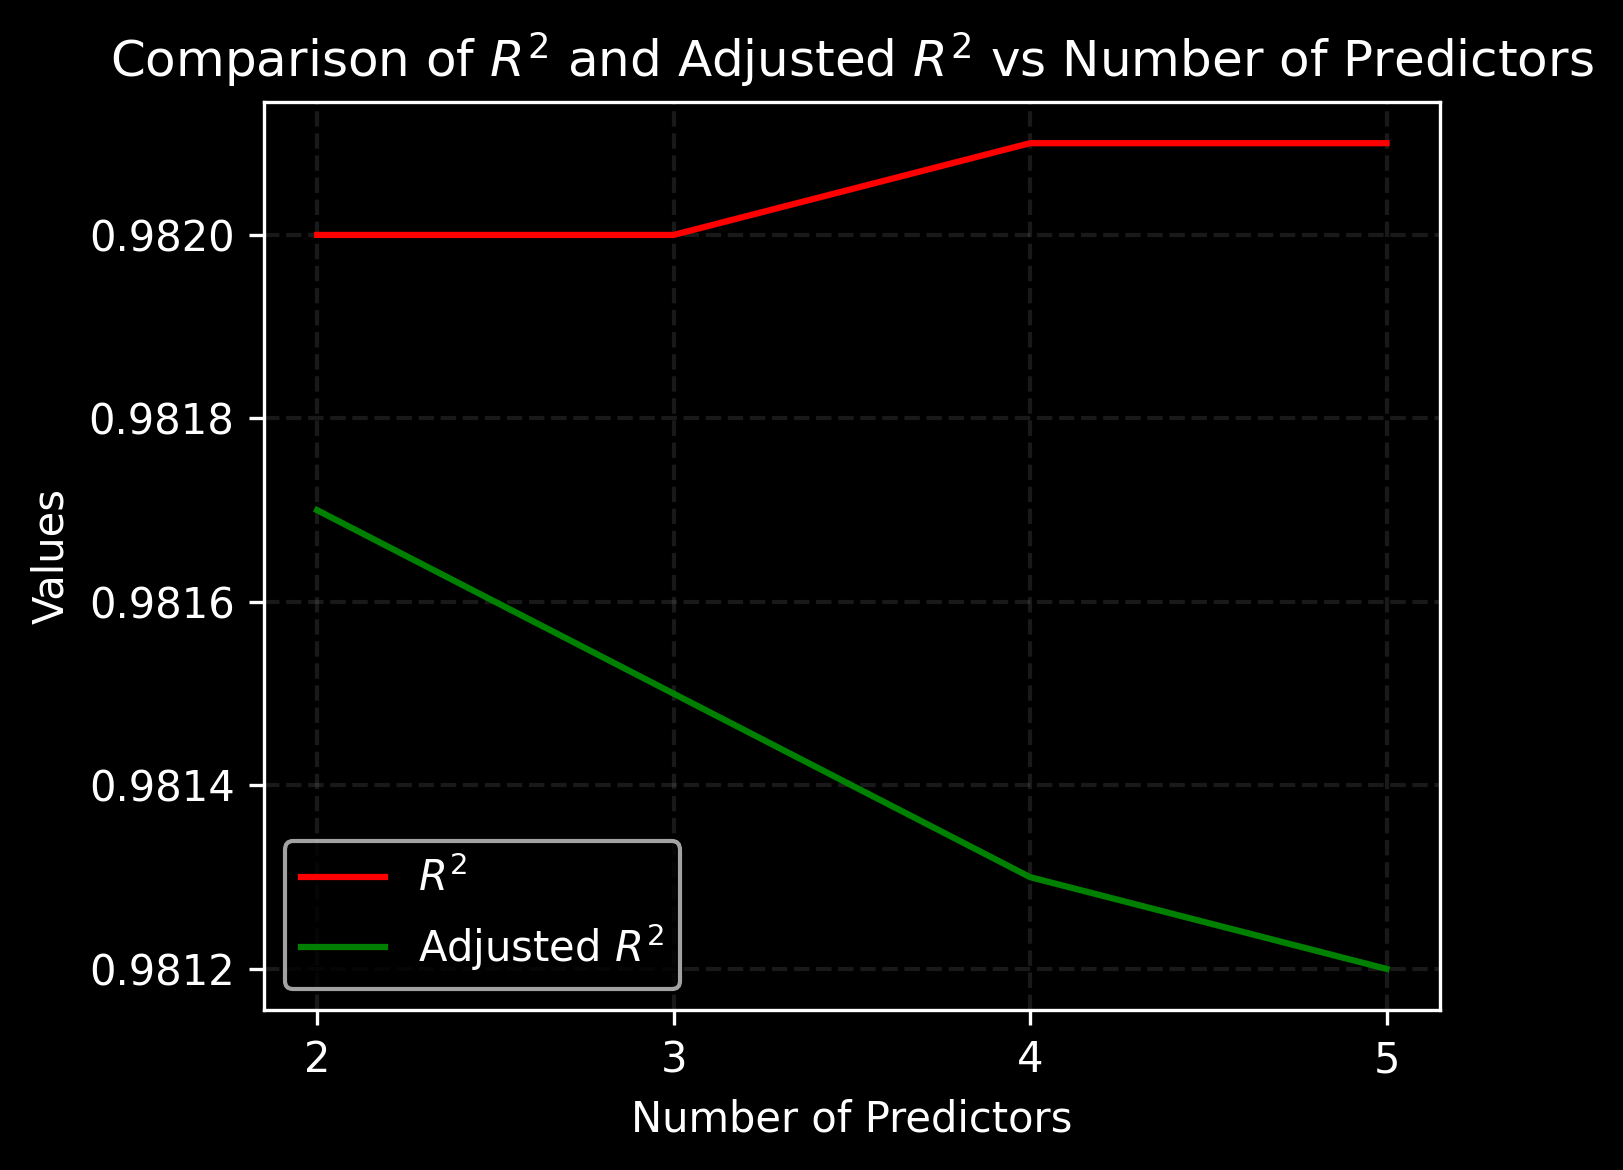

In [6]:
plt.figure(figsize=(5, 4), dpi=300)
plt.grid(color='gray', linestyle='--', linewidth=1.0, alpha=0.2)
tmp = metrics_df.iloc[1:, :]
sns.lineplot(data=tmp,x='Num Variables', y="R^2", 
             color="red", label='$R^2$')
sns.lineplot(data=tmp, x='Num Variables', y="Adjusted R^2", 
             color="green", label='Adjusted $R^2$')

plt.title('Comparison of $R^2$ and Adjusted $R^2$ vs Number of Predictors')
plt.xlabel('Number of Predictors'); plt.ylabel('Values')
plt.xticks(np.arange(2, tmp['Num Variables'].max() + 1, 1))
plt.tight_layout()
plt.show()

### Conclusion

This analysis revealed that $x_1$ and $x_2$ were the only significant predictors for the dependent variable $y$. While the coefficient of determination, $R^2$, either increased or remained constant with the addition of irrelevant variables, adjusted $R^2$ decreased, demonstrating its effectiveness in evaluating model performance. Thus, adjusted $R^2$ is a more reliable metric than $R^2$ for preventing overfitting and accurately representing the predictors' relationship with the response variable.
